<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Bienvenue</h4>
    asdfasdfhave <i>any</i> asdfasdf
</div>

## Imports

In [327]:
# This is a comment
# First we import built-in libraries
import random                  
from fractions import Fraction   

# Then some 3rd party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from music21 import chord, corpus, environment, meter, midi, note, stream, tempo

### MuseScore3 Windows

In [328]:
# Windows (adapt Program Files)
# musescore_executable = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe'

# environment.set('musescoreDirectPNGPath', musescore_executable)
# environment.set('musicxmlPath', musescore_executable)
# environment.set('autoDownload', 'allow')

### MuseScore3 Mac

In [3]:
# Mac path
musescore_executable = '/Applications/MuseScore 3.app/Contents/MacOS/mscore'

environment.set('musescoreDirectPNGPath', musescore_executable)
environment.set('musicxmlPath', musescore_executable)
environment.set('autoDownload', 'allow')

# Tools

In [329]:
# random numbers
random.seed(0);

# function to return key for any value
def getKeyFromValue(_dictionnary, _value):
    for key, value in _dictionnary.items():
         if _value == value:
             return key
 
    return None; #doesn't exist

# Play

In [330]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play();

# Notes

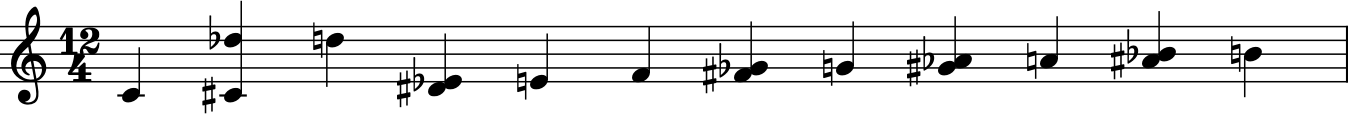

In [331]:
notes = [['C'], ['C#', 'Db5'], ['D5'], ['D#', 'Eb'], ['E'], ['F'], ['F#', 'Gb'], ['G'], ['G#','Ab'], ['A'], ['A#','Bb'], ['B']]
m = stream.Measure()
m.append([chord.Chord([note.Note(name) for name in pitch_class]) for pitch_class in notes]);

m.show();
play(m);

## Scales / Chords

##### The following function, *isSameNoteWithoutOctave()*, function takes two notes and checks whether they represent the same note without looking at the octave. It returns true if they represent the same note and false otherwise

In [332]:
#This function takes two notes and checks whether they represent the same note without looking at the octave. It returns true if they represent the same note and false otherwise
def isSameNoteWithoutOctave(note1, note2):
    
    if note1.pitch.name == note2.pitch.name: 
        return True;
    
    # To lose the octave information
    n1 = note.Note(pitch = note1.pitch.name);
    n2 = note.Note(pitch = note2.pitch.name);
    
    if n1.pitch.frequency == n2.pitch.frequency:
        return True;
    
    return False;

##### Example using the function *isSameNoteWithoutOctave()*

In [333]:
d = note.Note("D#3");
e = note.Note("Eb5");

print(isSameNoteWithoutOctave(d,e));

True


### Scale

In [334]:
# Scales interval dictionnary links the name of the scale and the amount of numbers between each note starting from the base note
scalesIntervalDictionnary = {
  "major": [0,2,4,5,7,9,11],
  "minor": [0,2,3,5,7,8,10],
  "dorian": [0,3,7] ##
}

# Scale is a class generating a musical scale / a range starting from the base note and the type of scale (major, minor, dorian or else). It can also generate a scale from a random base and random type.
class Scale:
    
    # Constructor
    def __init__(self, _baseNote = note.Note('C4'), _interval = scalesIntervalDictionnary["major"], _randomBase = False, _randomMinorMajorScale = False):
              
        if _randomBase == True:
            self.baseNote = note.Note(pitch = random.randint(0,11));
        else: 
            self.baseNote = _baseNote;
             
        if _randomMinorMajorScale == True:
            r = random.randint(0,1);
            if r == 1:
                self.interval = scalesIntervalDictionnary["major"];
            else:
                self.interval = scalesIntervalDictionnary["minor"];
        else:
            self.interval = _interval;
        
    
    # Transposes the base note (of i semi tones) --> DELETED, NOT USED ANYMORE
    def baseTranspose(self, i):
        return self.baseNote.transpose(i);
    
    # Gets the ith tone of the scale, i = 1 returns the fundamental, i = 2 returns the "seconde"
    def getTone(self, i):
        return self.baseNote.transpose(self.interval[(i-1)%len(self.interval)]);
    
    # Get notes of the scale without considering the octave
    def getNotesWithoutOctave(self):       
        n = [self.baseNote.transpose(i) for i in self.interval];
        return n;
    
    def isToneOnScale(self, note):
        for i in range(len(self.interval)):
            if isSameNoteWithoutOctave(self.baseNote.transpose(self.interval[i]), note):
                return True;
        return False;
    
    # is Minor if the third minor is on the scale
    def isMinor(self):
        return self.isToneOnScale(self.baseNote.transpose(3));
    
    # is Major if the third major is on the scale
    def isMajor(self):
        return self.isToneOnScale(self.baseNote.transpose(4));
    
    
    # show is a function that shows all the notes of the scale.
    def show(self):   
        text = self.baseNote.pitch.name;
        if self.isMajor():
            text += " major";
        if self.isMinor():
            text += " minor";
        print(text, self.interval);  
        
        m = stream.Measure();
        m.append([self.baseNote.transpose(i) for i in self.interval]);     
        m.append(self.baseNote.transpose(12));
        m.show();
        
        
        
        

##### Example of a scale. The scale constructed here is the C minor scale

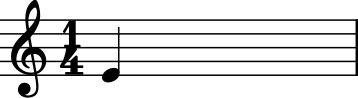

minor: False
C major [0, 2, 4, 5, 7, 9, 11]


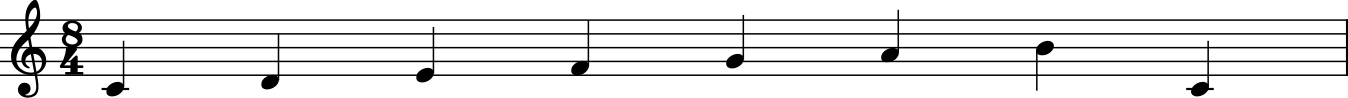

In [335]:
s = Scale(note.Note("C"), scalesIntervalDictionnary["major"]);
s.getTone(3).show() # la tierce
print("minor:", s.isMinor())
s.show();

### Chord

In [336]:
# Chords type dictionnary
chordsDictionnary = {
  "": [0,4,7],
  "5": [0,7],
  "m": [0,3,7],
  "7": [0,4,7,10],
  "m7": [0,3,7,10]
}

# Chord is a class constructing a chord based on a base note and a scale
class Chord:
    
    # Constructor
    def __init__(self, _baseNote, _scale):

        self.baseNote = _baseNote;
        self.interval = [0]; # 1th and 5th
        
        if _scale.isToneOnScale(_baseNote.transpose(3)) == True:
            self.interval.append(3);
        elif _scale.isToneOnScale(_baseNote.transpose(4)) == True:           
            self.interval.append(4);
            
        self.interval.append(7);
        
        
        
    # Define (like a constructor)
    def defineByType(self, _baseNote, _type = ""):       
        self.baseNote = _baseNote;
        self.interval = chordsDictionnary[_type];
        
        
   # def __init__(self, *args, **kwargs):   
   #     #args -- tuple of anonymous arguments
        #kwargs -- dictionary of named arguments
     #   print ('args: ', args, ' kwargs: ', kwargs);
        
     #   self.baseNote = kwargs["_baseNote"];
        
     #   if kwargs.get("_scale") != None:
            
        
      #  print(kwargs.get("michel3"))
     #   print(kwargs.keys())
            
    def baseTranspose(self, i):
        return self.baseNote.transpose(i);
    
    
    def getType(self):
        key = getKeyFromValue(chordsDictionnary, self.interval);
        if key != None:
            return key;
        return "Not in dictionnary";
    
    def getName(self):
        return self.baseNote.name + self.getType();
    
    # Major or minor chord
    #def isMajor(self):
        #if self.type.find("m") == -1:
       #     return True;
      #  return False;
    
    #def isMinor(self):
     #   return not self.isMajor();
    
    
    
    # only for scale ?
    #def getTone(self, i): # with i from 1 to 7.
        #minor = [0,2,3,5,7,8,10];
        #return self.baseTranspose(minor[(i-1)%7]);
        #return self.baseNote.transpose(self.scale.interval[(i-1)%7]);$
       # return note.Note(3)
    
    # Get notes
    def getNotesWithoutOctave(self):       
        n = [self.baseNote.transpose(i) for i in self.interval];
        return n;
    
    
    def getNotesWithOctave(self, _octave = 4):       
        n = [note.Note(pitch = self.baseNote.transpose(i).pitch.name, octave = _octave) for i in self.interval];
        return n;
    
    
    def getChordObject(self):
        return chord.Chord(self.getNotesWithOctave());
    
    # Show
    def show(self):
        self.getChordObject().show();
        
    def getText(self):
        return self.baseNote.pitch.name + " " + self.getType();
        
    def showText(self):
        print(self.getText());  

##### Example of a chord construction. The chord is constructed base on the note F and the scale s defined in the previous example.

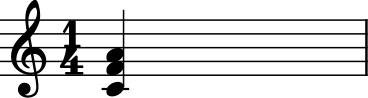

F
[0, 4, 7]
[<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
<music21.note.Note C>
C3
C
3
<music21.note.Note C>


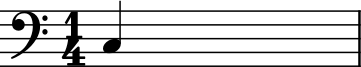

In [337]:
c = Chord(_baseNote = note.Note("F"), _scale = s);
c.show();
print(c.getName());
print(c.interval)
print(c.getNotesWithOctave())


a = [0,3,7];
[note.Note(pitch = note.Note("C").transpose(i).pitch, octave = 1) for i in a]

n = note.Note(pitch = note.Note("C").pitch.name, octave = 3)
#n = note.Note(pitch = note.Note("C").transpose(i).pitch.name, octave = 3)
print(n)
print(n.pitch)
print(n.pitch.name)
print(n.pitch.octave)


bassNote = note.Note(pitch = "C", octave = 3);
print(bassNote)
bassNote.show()


## NotesRange

In [338]:
class NotesRange:
    
    # Constructor
    def __init__(self, _octaveNumber = 8):  
        
        self.range = {}; # Dictionnary
        for o in range(_octaveNumber):
            for i in range(0,12):
                n = note.Note(pitch = i);
                self.range[n.pitch.name + str(o)] = 0;   
        
        self.range["C" + str(o+1)] = 0; # highest C
                
                
    # Add chance/probability to notes (without octave) 
    # if _probability is empty, then all notes' probability will be increased by 1 
    def addChanceToNotesWithoutOctave(self, _notes = [], _probabilities = [], _probability = 1):
        
        if len(_notes) != 0 and len(_probabilities) < len(_notes):
            _probabilities = [_probability for i in _notes];
        
        for key in self.range:
            for x in range(len(_notes)):
                if isSameNoteWithoutOctave(note.Note(key), _notes[x]) == True:
                    self.range[key] += _probabilities[x];
        return;
    
    
    def multiplyChanceToNotesWithoutOctave(self, _notes = [], _probabilities = [], _probability = 1):
        
        if len(_notes) != 0 and len(_probabilities) < len(_notes):
            _probabilities = [_probability for i in _notes];
        
        for key in self.range:
            for x in range(len(_notes)):
                if isSameNoteWithoutOctave(note.Note(key), _notes[x]) == True:
                    self.range[key] *= _probabilities[x];
        return;
    
    
    # Mulitiply by a function. 0 is the _zeroNote and then +1 for the next note etc, 12 is the distance for an octave
    def multiplyByFunction(self, _function, _zeroNote = note.Note("C4")):              
        keysLength = len(self.range.keys());
        for key in self.range.keys():             
            x = note.Note(key).pitch.midi - _zeroNote.pitch.midi;                     
            #print(key + "  " + str(x) + " f(x): " + str(_function(x)))
            self.range[key] *= _function(x);   
            
    # Add a function to the NotesRange  
    def addFunction(self, _function, _zeroNote = note.Note("C4")):
              
        keysLength = len(self.range.keys());
        for key in self.range.keys():             
            x = note.Note(key).pitch.midi - _zeroNote.pitch.midi;                     
            self.range[key] += _function(x); 
    
    # Add another NotesRange
    def addNotesRange(self, _noteRange):
        for key in self.range.keys():      
            self.range[key] += _noteRange.range[key];   
            
            
    def pickRandomNote(self):
        totalProbability = 0;
        for key in self.range.keys(): 
            totalProbability += self.range[key];
        
        r = random.randint(1,totalProbability);
        #print(str(totalProbability) +"  " + str(r));
        
        counter = 0;
        for key in self.range.keys():
            counter += self.range[key];
            if counter >= r:
                return note.Note(key);          
        return None; # empty notesRange
    
    # Show 
    def show(self):
        print(self.getText());
        
    # Get Text for show()
    def getText(self):
        txt = "{ ";
        for key in self.range.keys():
            value = self.range[key];
            if value != 0:
                txt += key + ": " + str(value) + ", ";
                
        if txt == "{ ":
            return "{ empty NotesRange }";
        return txt[:-2] + " }";
    
    
    # Show Full NotesRange   
    def showFull(self):
        print(self.range);
        
    # Show Plot
    def showPlot(self):
        keys = self.range.keys();
        values = self.range.values();
        plt.bar(keys, values);

##### The following cell serves as a test for the NotesRange class.

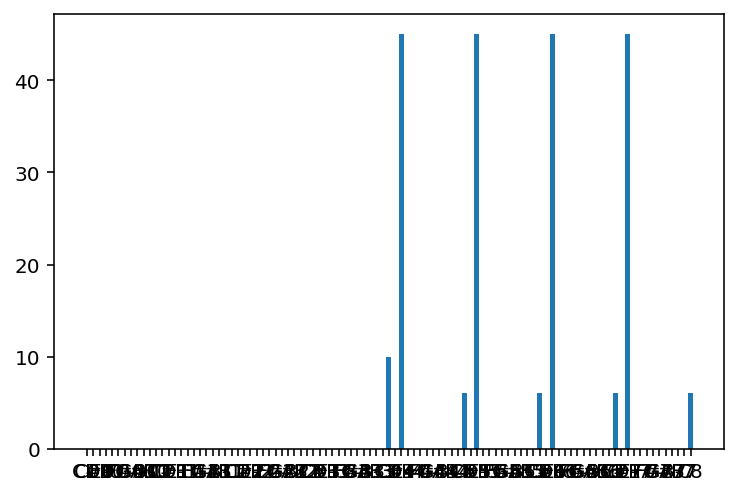

In [339]:
# NotesRange test

nr = NotesRange();

nr.addChanceToNotesWithoutOctave([note.Note("C"),note.Note("D")], [2,15]);


def ff(x): 
    if x < 0:
        return 0;
    if x == 0:
        return 5;
    return 3;


nr.multiplyByFunction(ff);
nr.showPlot();

### Bass test 1

<music21.note.Note A> [0, 2, 3, 5, 7, 8, 10]
A minor [0, 2, 3, 5, 7, 8, 10]


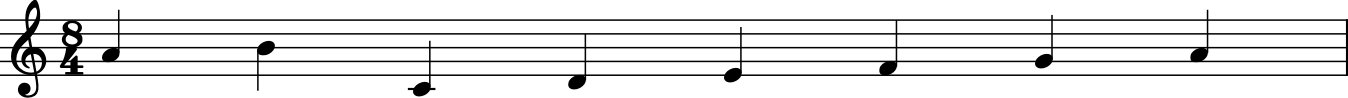

minor


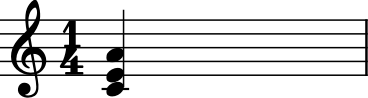

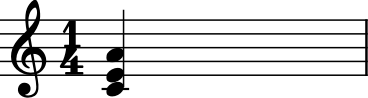

ici
<music21.note.Note D>


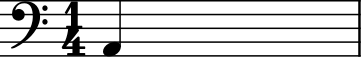

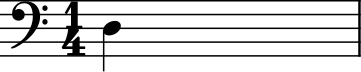

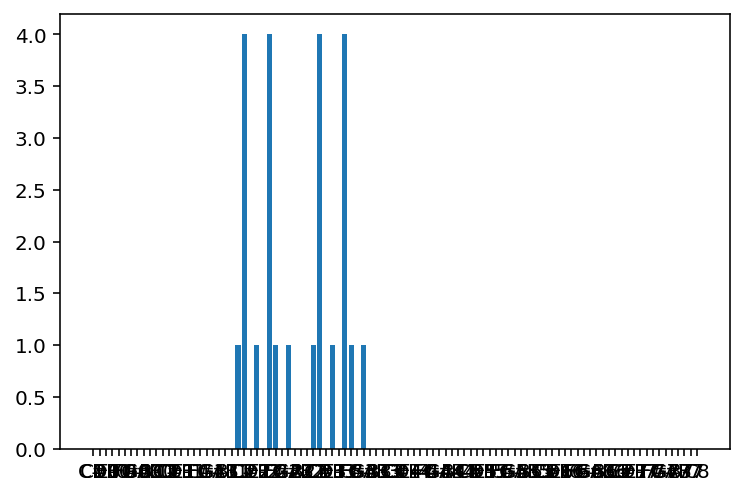

In [340]:
### Random scale
#s = Scale(_randomBase = True, _randomMinorMajorScale = True);
s = Scale(note.Note("A"), scalesIntervalDictionnary["minor"])
print(s.baseNote, s.interval)
s.show();

if s.isToneOnScale(s.baseTranspose(3)) == True:
    print("minor")
else:
    print("major")
        

bassNote = note.Note(pitch = s.baseNote.pitch.name, octave = 2); # A2
        
c1 = Chord(bassNote, s);
c1.show();

m = stream.Measure();
m.append(c1.getChordObject());
m.show();
play(m);
        
nr = NotesRange();
nr.addChanceToNotesWithoutOctave(s.getNotesWithoutOctave());
#nr.showPlot();

nr.addChanceToNotesWithoutOctave(c1.getNotesWithoutOctave(), _probability = 3)

nr.multiplyChanceToNotesWithoutOctave([bassNote], _probability = 0); #avoir playing the bass again / optionnal ?

#nr.showPlot();

c1.getNotesWithoutOctave()


def gauss(x):
    if x < 12 and x > -12:
        return 1;
    return 0;

nr.multiplyByFunction(gauss, bassNote);
nr.showPlot();

bassNote2 = nr.pickRandomNote();
print("ici")
print(bassNote2)
bassNote.show();
bassNote2.show();

### Bass test 2

Scale:  C major [0, 2, 4, 5, 7, 9, 11]
C major [0, 2, 4, 5, 7, 9, 11]


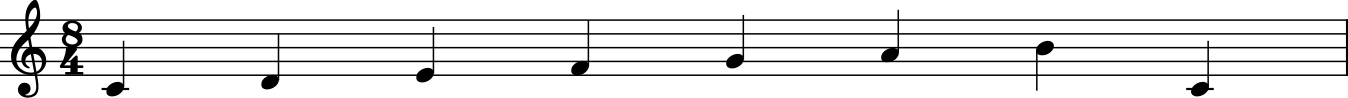


NotesRange:
0 { D2: 1, E2: 3, F2: 1, G2: 3, A2: 1 }
1 { D2: 3, E2: 1, F2: 1, A2: 1, C3: 1 }
2 { D2: 1, F2: 1, G2: 3, A2: 1, C3: 1 }


In [ ]:
### Random scale
#s = Scale(_randomBase = True, _randomMinorMajorScale = True);
s = Scale(note.Note("C"), scalesIntervalDictionnary["major"]);


scaleType = "minor";
if s.isMinor() == False:
    scaleType = "major";
print("Scale: ", s.baseNote.pitch.name, scaleType, s.interval);
s.show();

# --> in tools !  $$ give 6 as parameter possible ? $$
def gauss(x):
    if x <= 6 and x > -6: # >= and > to exactly have one octave
        return 1;
    return 0;


# input
octaveRegion = 2;
nbr = 8;
bassNotes = [];  # stores music21's note.Note()
bassChords = []; # stores Chord objects

bassNotes.append(note.Note(pitch = s.baseNote.pitch.name, octave = octaveRegion)); # bassNotes[0]
bassChords.append(Chord(bassNotes[0], s));                                         # bassChords[0]

print("\nNotesRange:")
for i in range(nbr): 
    
    # Bass Rules
    nr = NotesRange();
    nr.addChanceToNotesWithoutOctave(s.getNotesWithoutOctave()); # notes of the scale
    
    if s.isMinor():
        nr.multiplyChanceToNotesWithoutOctave([s.getTone(2)], _probability = 0);
    if s.isMajor():
        nr.multiplyChanceToNotesWithoutOctave([s.getTone(7)], _probability = 0);
        
    nr.multiplyChanceToNotesWithoutOctave(bassChords[i].getNotesWithoutOctave(), _probability = 3); # notes of the chord from the bassNotes[i]
    nr.multiplyChanceToNotesWithoutOctave([bassNotes[i]], _probability = 0); # avoir playing the same bassNotes[i] again
    nr.multiplyByFunction(gauss, note.Note(pitch = 6, octave = octaveRegion)); # range, to stay in the octaveRegion
    
    
    nr.showPlot();
    print(i, nr.getText());
    bassNotes.append(nr.pickRandomNote());     #bassNotes[i+1]
    bassChords.append(Chord(bassNotes[i+1], s)); #bassChords[i+1]
    

print("\nChords:")
score = stream.Score()

measureBassNotes = stream.Part();
measureBassChords = stream.Part();

score.insert(0, measureBassChords);
score.insert(0, measureBassNotes);

for i in range(nbr):
    print(i, bassChords[i].getText(), bassChords[i].getNotesWithoutOctave());  
    measureBassChords.append(bassChords[i].getChordObject());
    measureBassNotes.append(bassNotes[i]);

score.show();
play(score);

## Bass function

In [ ]:
def bass(_scale, _chordsNbr = 4, _octaveRegion = 2):
    
    bassNotes = [];  # stores music21's note.Note()
    bassChords = []; # stores Chord objects

    bassNotes.append(note.Note(pitch = _scale.baseNote.pitch.name, octave = _octaveRegion)); # bassNotes[0]
    bassChords.append(Chord(bassNotes[0], _scale));                                          # bassChords[0]

    for i in range(_chordsNbr-1): 

        # Bass Rules
        nr = NotesRange();
        nr.addChanceToNotesWithoutOctave(_scale.getNotesWithoutOctave()); # notes of the scale

        if _scale.isMinor():
            nr.multiplyChanceToNotesWithoutOctave([_scale.getTone(2)], _probability = 0);
        if _scale.isMajor():
            nr.multiplyChanceToNotesWithoutOctave([_scale.getTone(7)], _probability = 0);

        nr.multiplyChanceToNotesWithoutOctave(bassChords[i].getNotesWithoutOctave(), _probability = 3); # notes of the chord from the bassNotes[i]
        nr.multiplyChanceToNotesWithoutOctave([bassNotes[i]], _probability = 0); # avoir playing the same bassNotes[i] again
        nr.multiplyByFunction(gauss, note.Note(pitch = 6, octave = _octaveRegion)); # range, to stay in the octaveRegion

        bassNotes.append(nr.pickRandomNote());     #bassNotes[i+1]
        bassChords.append(Chord(bassNotes[i+1], s)); #bassChords[i+1]
        
        
    return {"bassNotes": bassNotes, "bassChords": bassChords};
    
    
    
def showBass(_bass, _play = False):
    bassNotes = _bass["bassNotes"];
    bassChords = _bass["bassChords"];
    
    print("\nChords:")
    score = stream.Score()

    measureBassNotes = stream.Part();
    measureBassChords = stream.Part();

    score.insert(0, measureBassChords);
    score.insert(0, measureBassNotes);
    
    
    for i in range(len(bassNotes)):
        print(i, bassChords[i].getText(), bassChords[i].getNotesWithoutOctave());  
        measureBassChords.append(bassChords[i].getChordObject());
        measureBassNotes.append(bassNotes[i]);

    score.show();
    if _play == True:
        play(score);

## The creator

In [ ]:
# Scale
#theScale = Scale(_randomBase = True, _randomMinorMajorScale = True);
theScale = Scale(); # 
theScale.show();


Chords:
0 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
1 D m [<music21.note.Note D>, <music21.note.Note F>, <music21.note.Note A>]
2 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
3 E m [<music21.note.Note E>, <music21.note.Note G>, <music21.note.Note B>]


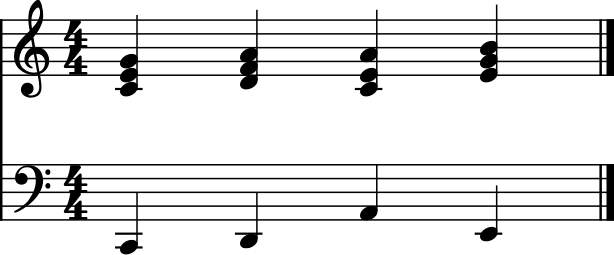

In [308]:
# Bass
theBass = bass(theScale, 4, 2);
showBass(theBass, _play = True);




quarterLengthCounter 1 measureCounter 0



quarterLengthCounter 2 measureCounter 0
i 1 measureCounter 0 C 
chordsProbability: 0 dur: 1
[<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
<music21.note.Note C>
{ A3: 1, B3: 1, D4: 1, F4: 1 }



quarterLengthCounter 4 measureCounter 0
i 2 measureCounter 0 C 
chordsProbability: 1 dur: 2
[<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
<music21.note.Note D>
{ A3: 1, B3: 1, C4: 1, D4: 1, E4: 1, F4: 1, G4: 1 }



quarterLengthCounter 8 measureCounter 1
i 3 measureCounter 1 D m
chordsProbability: 4 dur: 4
[<music21.note.Note D>, <music21.note.Note F>, <music21.note.Note A>]
<music21.note.Note E>
{ B3: 1, C4: 1, D4: 4, E4: 1, F4: 4, G4: 1, A4: 4 }


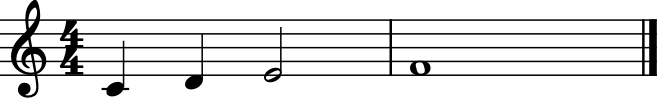

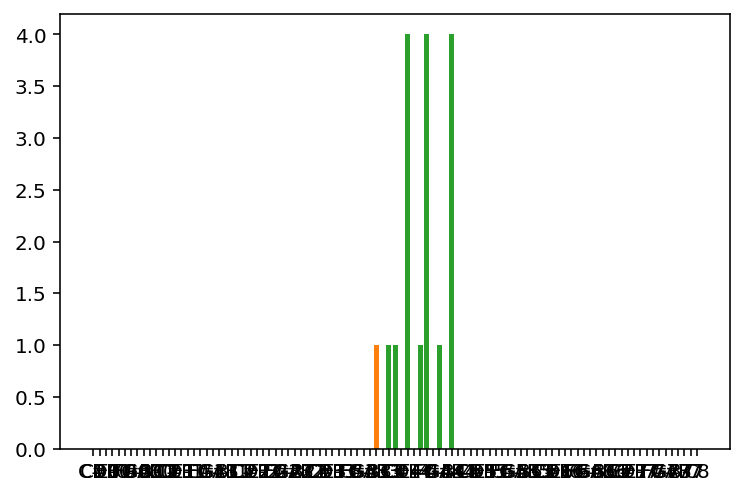

In [326]:
# Melody
theDurations = [1, 1, 2, 4]
theMelody = getMelody(theScale, theBass["bassChords"], theDurations)

melodyStream = getStreamFromNotes(theMelody);
melodyStream.show();
play(melodyStream);

## Melody with chords function

In [324]:
def getMelody(_scale, _bassChords, _durations):
    
    melodyNotes = [];
      
    measureCounter = 0;
    quarterLengthCounter = 0;

    for i in range(len(_durations)):
        
        print("\n\n");
        dur = _durations[i];
        
        # Rest
        if dur < 0: # Rest # $$$ définir comment les rests ? Ici < 0 ? 
            ### m.append(note.Rest(quarterLength = abs(durations[i])));
            print("Rest")
            
        # Note
        elif dur > 0:
                      
            quarterLengthCounter += dur;
            measureCounter = int(quarterLengthCounter/4-0.01);
            print("quarterLengthCounter", quarterLengthCounter, "measureCounter",measureCounter);
            
            if measureCounter > len(_bassChords)-1:
                print("finishe",measureCounter, len(_bassChords))
                break;
            
            # First note
            if i == 0:
            
                melodyNotes.append(note.Note("C4"));
                melodyStream.append(note.Note());
            
            # Following notes
            else:

                print("i",i, "measureCounter", measureCounter, _bassChords[measureCounter].getText())
                
                
                # Melody Rules
                nr = NotesRange();
                nr.addChanceToNotesWithoutOctave(_scale.getNotesWithoutOctave()); # notes of the scale

                chordsProbability = int(0.25 * dur**2); # more probability on a chord, if the note is longer           
                nr.multiplyChanceToNotesWithoutOctave(_bassChords[measureCounter].getNotesWithoutOctave(), _probability = chordsProbability); # notes of the chord from the bassNotes[i]
                nr.multiplyByFunction(gauss, melodyNotes[-1]); # range, to stay in the octaveRegion
                
                print("chordsProbability:",chordsProbability, "dur:", dur)
                print(_bassChords[measureCounter].getNotesWithoutOctave())
                print(melodyNotes[-1])
                

                #nr.multiplyChanceToNotesWithoutOctave([bassNotes[measureCounter]], _probability = 0); # avoir playing the same bassNotes[i] again
                

                nr.showPlot();
                nr.show();
                
                n = nr.pickRandomNote();
                n.quarterLength = abs(dur);


                melodyNotes.append(n)
                melodyStream.append(n);
        
        else:
            print("duration = 0")
    
    return melodyNotes;





In [277]:
def getStreamFromNotes(_notes):
    s = stream.Stream();
    s.timeSignature = meter.TimeSignature('4/4');
    s.append(_notes);
    return s;

# Rhythm section

In [16]:
import random
from music21 import midi, note, stream, instrument, meter, key, duration
import nltk
import mchmm
from fractions import Fraction

# Rhythm generation

In [17]:
def create_percussion(time_sig = None):
    if time_sig == None:
        drumPart = stream.Measure()
    else:
        drumPart = stream.Stream()
        drumPart.timeSignature = meter.TimeSignature(time_sig)
    
    drumPart.insert(0, instrument.TomTom())
    return drumPart

def append_event(duration, original_stream, rest = False, pitch = "C4"):
    new_stream = original_stream
    if rest:
        new_stream.append(note.Rest(quarterLength = duration*4))
    else:
        new_stream.append(note.Note(pitch, quarterLength = duration/4))
                          
    return new_stream

def rhythm_from_sequence(durations, time_sig = None, pitch = 'C4', rhythm=None):
    if rhythm is None:
        rhythm = create_percussion(time_sig = time_sig)
                          
    for dur in durations:
        is_rest = False
        if dur != 0:
            if dur < 1:
                is_rest = True
                dur = Fraction(dur)
            
            rhythm = append_event(dur, rhythm, rest = is_rest, pitch = pitch) 
    return rhythm

# Play the rhythm

In [18]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play()

# The tree

In [19]:
def findCeil(arr, r, l, h) :
 
    while (l < h) :   
        mid = l + ((h - l) >> 1);
        if r > arr[mid] :
            l = mid + 1
        else :
            h = mid
     
    if arr[l] >= r:
        return l
    else :
        return -1
 
def myRand(arr, freq, n):
    prefix = [0] * n
    prefix[0] = freq[0]
    for i in range(n):
        prefix[i] = prefix[i - 1] + freq[i]

    r = random.randint(0, prefix[n - 1]) + 1
    
    indexc = findCeil(prefix, r, 0, n - 1)
    return arr[indexc]
    
def generate_random_tree(arr=[], freq=[], n_arr=0, nodelist=[], idx=0, parent=None, 
                         depth=0, max_children=4, max_depth=4):
    if 0 <= depth < max_depth:
        n = random.randint(1, max_children)
        nodelist.extend([[idx+i, parent, depth, myRand(arr, freq, n_arr)] for i in range(n)])  

        [generate_random_tree(arr, freq, n_arr, nodelist, len(nodelist), idx+i, depth+1, max_children, max_depth) 
                              for i in range(n)]

    elif depth == max_depth:
        n = random.randint(0, max_children)
        nodelist.extend([[idx+i, parent, depth, myRand(arr, freq, n_arr)] for i in range(n)])  
        return
#Build a list of nodes in a random tree up to a maximum depth.
    #:param:    nodelist     list, the nodes in the tree; each node is a list with elements [idx, parent, depth]
    #:param:    idx          int, the index of a node
    #:param:    parent       int, the index of the node's parent
    #:param:    depth        int, the distance of a node from the root
    #:param:    max_children int, the maximum number of children a node can have
    #:param:    max_depth    int, the maximum distance from the tree to the root"""
     
def get_path():
    tree = [[0, None, 0, 1]]
    generate_random_tree(arr, freq, n_arr, nodelist=tree, idx=len(tree), parent=0, 
                         depth=1, max_children=3, max_depth=10)

    parent = 0
    path = []
    child = []
    children = 0

    while children == 0:
        children = 1

        for x in range(len(tree)):
            if tree[x][1] == parent: #on a trouvé des enfants
                child.append(tree[x][0])
                children = 0
        if child:
            rdm = child[random.randint(0, len(child)-1)]
            path.append(tree[rdm][3])
            parent = tree[rdm][0]
    
    return path;

 #---------------------------------------------------------------------------------------------------

### Constants
    
# 16:ronde, 8:blanche, 4:noire, 2:croche, 1:double croche
# 1/2:demi pause, 1/4:soupir, 1/8:demi soupir

arr = [1, 2, 4, 8, 16, 1/2, 1/4, 1/8]; 
freq = [5, 50, 30, 20, 10, 3, 2, 1];

random.seed(0)
n_arr = len(arr)

[2, 2, 4, 2, 4, 4, 2, 2, 8, 8, 8, 8, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 8, 2, 8, 8, 2, 2, 8, 2, 4, 2, 2, 4, 4, 4, 2, 4, 8, 2, 2, 4, 2, 8, 2, 2, 4, 4, 4, 8, 2, 2, 2, 2, 2, 2, 2, 16, 2, 2, 2, 2, 16, 2, 4, 4, 8, 4, 2, 4, 2, 1, 1, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 8, 4, 2, 4, 8, 2, 2, 2, 2, 4, 2, 2, 2, 4, 1, 4, 2, 4, 2, 2, 4, 2, 8, 2, 8, 8, 2, 2, 4, 4, 2, 2, 2, 2, 2, 8, 4, 4, 2, 0.5, 2, 2, 2, 2, 1, 4, 2, 2, 4, 2, 2, 4, 16, 1, 8, 4, 2, 2, 2, 1, 2, 4, 2, 1, 4, 2, 4, 2, 1, 2, 1, 4, 4, 2, 4, 1, 4, 4, 4, 2, 4, 2, 2, 4, 1, 1, 4, 4, 2, 1, 2, 1, 1, 2, 2, 4, 2, 2, 2, 1, 8, 2, 2, 2, 8, 4, 2, 1, 1, 2, 2]
<music21.stream.Stream 0x29237212be0>


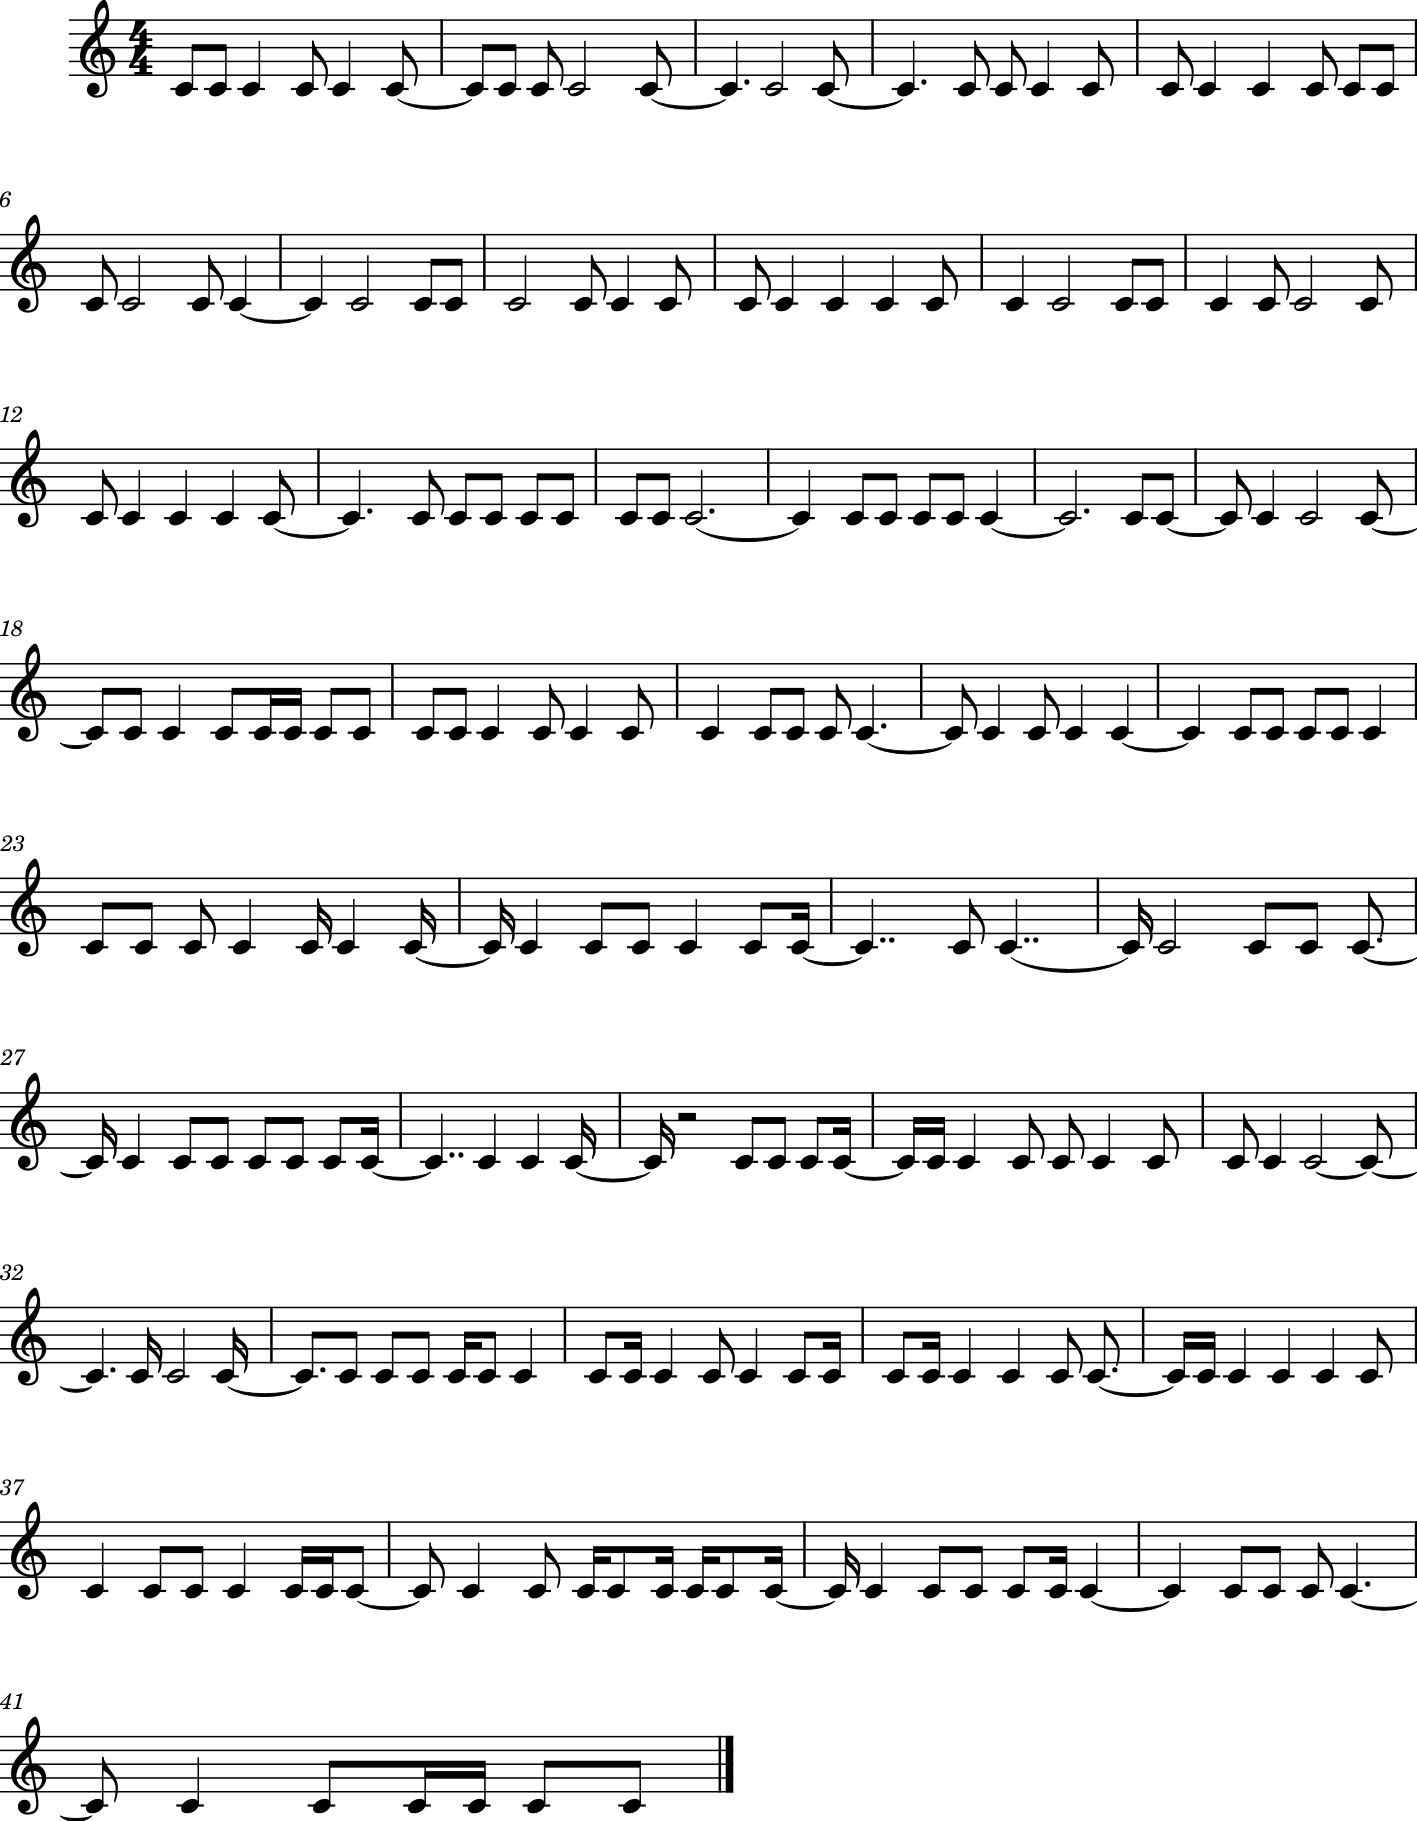

In [42]:
pathH = get_path();
print (pathH)
path_rhythm = create_percussion(time_sig = '4/4')
print(path_rhythm)
path_rhythm = rhythm_from_sequence(pathH, rhythm=path_rhythm)
path_rhythm.show()

In [21]:
#play(path_rhythm)

## Mix Notes and Melody

In [22]:
class Score:
    
    # Constructor
    def __init__(self, _notes, _rhythm ): #_range , _timeSignature = '4/4'):  
        
        #Create the score
        self.Menuet = stream.Score()
        
        #Create right-and left-hand parts, in 3/8 meter
        self.RightHand = stream.Part()
        self.RightHand.append(meter.TimeSignature('4/4'))
        self.LeftHand = stream.Part()
        self.LeftHand.append(meter.TimeSignature('4/4'))
        
        #Insert right- and left-hand parts at the beginning of the score
        self.Menuet.insert(0, self.RightHand)
        self.Menuet.insert(0, self.LeftHand)
        
        self.noteList = []
        #self.range = _range; # Dictionnary
        for i in range (len(_notes)):
            
            self.noteList.append(note.Note(_notes[i]))
            self.noteList[i].duration.quarterLength= _rhythm[i]
            print (self.noteList[i])
            print (self.noteList[i].duration)
        
        #Insert notes for the two hands in the corresponding stream.Part objects, depending on coin toss    
        self.RightHand.append(self.noteList)
        self.LeftHand.append(self.noteList)
        
        self.Menuet.show()
    # Show
    def show(self):
        self.Menuet.show()
        
    def play(self):
        play(self.Menuet)

<music21.note.Note D>
<music21.duration.Duration 0.25>
<music21.note.Note C>
<music21.duration.Duration 0.5>
<music21.note.Note E>
<music21.duration.Duration 1.0>
<music21.note.Note F>
<music21.duration.Duration 2.0>
<music21.note.Note G>
<music21.duration.Duration 1.5>
<music21.note.Note A>
<music21.duration.Duration 3.0>


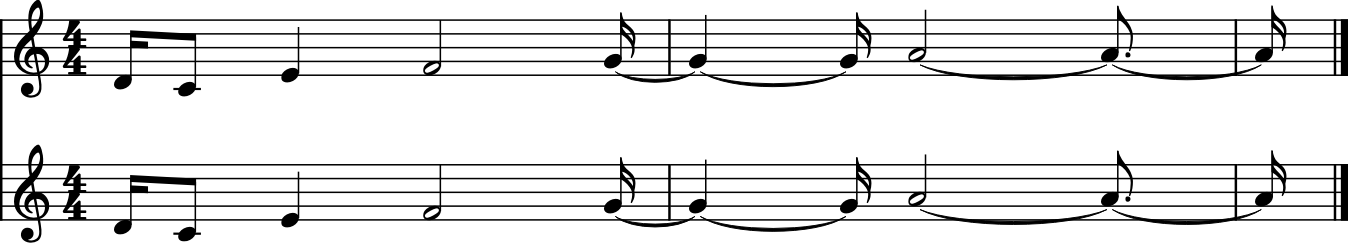

In [23]:
bla = Score (['D4', 'C4', 'E4', 'F4', 'G4', 'A4'], [1/4, 1/2, 1, 2, 1.5, 3]) #, 'Emajor')

In [25]:
class Score2:
    
    # Constructor
    def __init__(self, _notes, _rhythm ): #_range , _timeSignature = '4/4'):  
        
        #Create the score
        self.Menuet = stream.Score()
        
        #Create right-and left-hand parts, in 3/8 meter
        self.RightHand = stream.Part()
        self.RightHand.append(meter.TimeSignature('4/4'))
        self.LeftHand = stream.Part()
        self.LeftHand.append(meter.TimeSignature('4/4'))
        
        #Insert right- and left-hand parts at the beginning of the score
        self.Menuet.insert(0, self.RightHand)
        self.Menuet.insert(0, self.LeftHand)
        
        self.noteList = []
        #self.range = _range; # Dictionnary
        for i in range (4):#(len(_notes)):
            
            #_notes[i].duration.quarterLength =_rhythm[i]
            #self.d.quarterLength = _rhythm[i]
            
            self.noteList.append(_notes[i])
            #self.noteList[i].duration.quarterLength= _rhythm[i]
            print (self.noteList[i])
            print (self.noteList[i].duration)
        
        #Insert notes for the two hands in the corresponding stream.Part objects, depending on coin toss    
        self.RightHand.append(self.noteList)
        self.LeftHand.append(self.noteList)
        
        self.Menuet.show()
        
    
    # Show
    def show(self):
        self.Menuet.show()
        
    def play(self):
        play(self.Menuet())
    

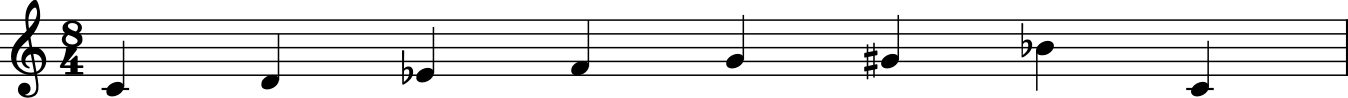

[<music21.note.Note C>, <music21.note.Note D>, <music21.note.Note E->, <music21.note.Note F>, <music21.note.Note G>, <music21.note.Note G#>, <music21.note.Note B->]
7
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note B->
['C', 'D', 'E-', 'F', 'G', 'G#', 'B-']
<music21.note.Note C>
<music21.duration.Duration 2.0>
<music21.note.Note D>
<music21.duration.Duration 4.0>
<music21.note.Note E->
<music21.duration.Duration 0.5>
<music21.note.Note F>
<music21.duration.Duration 0.5>
<music21.note.Note G>
<music21.duration.Duration 1.0>
<music21.note.Note G#>
<music21.duration.Duration 0.5>
<music21.note.Note B->
<music21.duration.Duration 0.5>


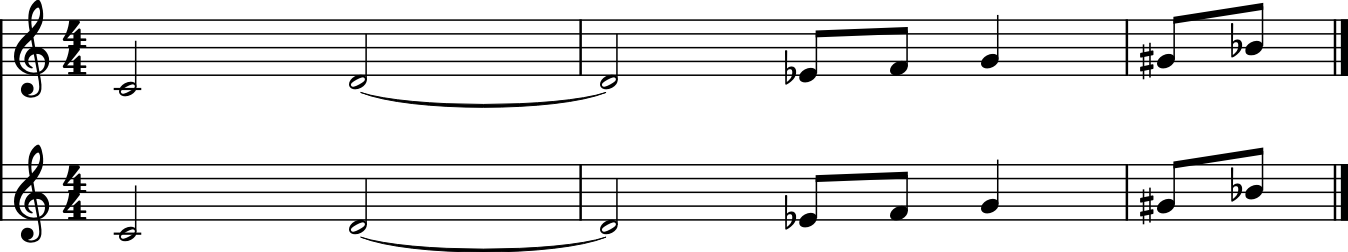

<music21.note.Note C>
<music21.duration.Duration 8.0>
<music21.note.Note D>
<music21.duration.Duration 16.0>
<music21.note.Note E->
<music21.duration.Duration 2.0>
<music21.note.Note F>
<music21.duration.Duration 2.0>
<music21.note.Note G>
<music21.duration.Duration 4.0>
<music21.note.Note G#>
<music21.duration.Duration 2.0>
<music21.note.Note B->
<music21.duration.Duration 2.0>


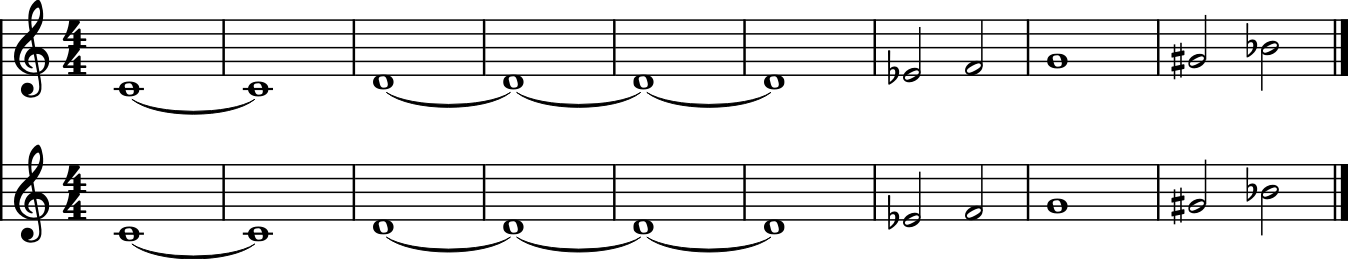

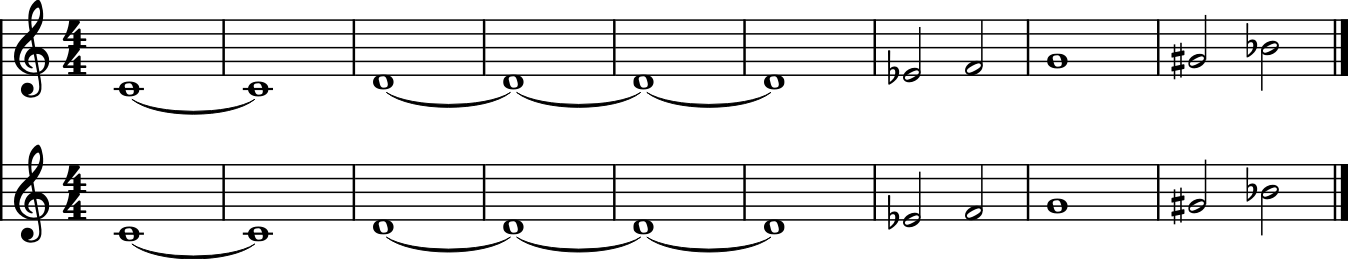

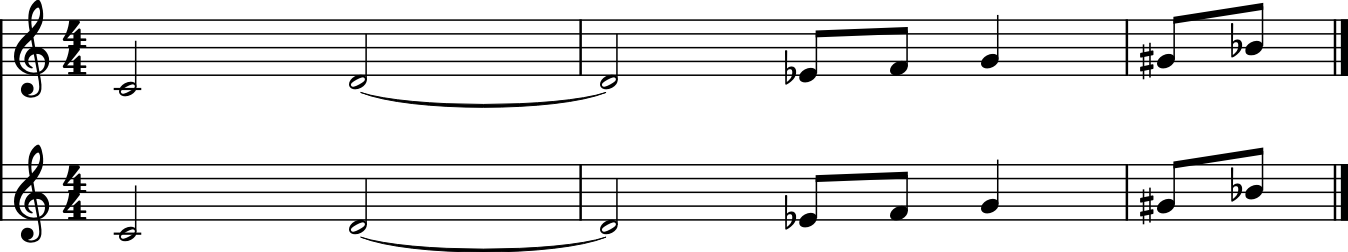

In [27]:
s = Scale(note.Note("C"), scalesIntervalDictionnary["minor"]);
s.show();
n= s.getNotesWithoutOctave()
print(n)

print(len(n))

m = []
for i in range (0,len(n)):
    print (n[i])
    m.append(n[i].pitch.name)
print(m)

quotient=[]

for number in pathH:
    quotient.append(number/4)

path = get_path()
bla2 = Score (m, quotient) #, 'Emajor')
bla3 = Score (m, pathH)
bla3.show()
bla2.show()
#bla2.play()

### 

In [28]:
path = get_path();
print (path)
path_rhythm = create_percussion(time_sig = '4/4')
print(path_rhythm)
path_rhythm = rhythm_from_sequence(path, rhythm=path_rhythm)
path_rhythm[3]

[2, 2, 2, 0.125, 4, 2, 2, 4, 4, 2, 8, 2, 2, 4, 8, 4, 2, 4, 4, 4, 2, 0.25, 2, 4, 8, 2, 2, 8, 2, 8, 4, 8, 8, 2, 2, 2, 4, 2, 2, 16, 2, 2, 0.125, 2, 4, 4, 2, 4, 8, 2, 8, 2, 2, 2, 2, 2, 4, 8, 2, 4, 4, 2, 4, 8, 2, 0.25, 2, 8, 2, 2, 2, 2, 4, 2, 4, 4, 8, 16, 8, 2, 4, 4, 4, 8, 16, 2, 2, 2, 4, 2, 2, 2, 4, 8, 4, 4, 8, 4, 4, 4, 4, 8, 2, 4, 4, 0.5, 8, 4, 8, 4, 2, 4, 4, 2, 0.5, 8, 8, 2, 2, 4, 4, 8, 2, 4, 2, 8, 0.5, 0.125, 2, 8, 2, 2, 2, 8, 8, 4, 8, 4, 16, 2, 8, 8, 16, 4, 16, 0.5, 16, 4, 8, 4, 4, 16, 2, 2, 0.25, 16, 2, 8, 16, 2, 8, 8, 8, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 0.5, 8, 2, 4, 2, 8, 2, 2, 8, 2, 2, 4, 8, 8, 2, 8, 4, 2, 2, 4, 2, 2, 0.125, 8, 16, 2, 8, 4, 2, 8, 2, 2, 4, 4, 4, 4, 2, 8, 8, 8, 0.125, 2, 8, 2, 4, 16, 0.5, 8, 2, 4, 8, 0.5, 0.5, 0.5, 4, 2, 0.125, 8, 4, 4, 16, 8, 0.5, 8, 2, 16, 8, 2, 2, 2, 8, 8, 2, 4, 8, 2, 2, 8, 2, 2]
<music21.stream.Stream 0x292261883d0>


<music21.note.Note C>

In [29]:
instruments = [instrument.Piano(), instrument.Percussion(), instrument.Guitar(), instrument.Flute()]

In [30]:
score = stream.Score()

measureBassNotes = stream.Part();
measureBassChords = stream.Part();

score.insert(0, measureBassChords);
score.insert(0, measureBassNotes);

for i in range(nbr):
    print(i, bassChords[i].getText(), bassChords[i].getNotesWithoutOctave());  
    measureBassChords.append(bassChords[i].getChordObject());
    measureBassNotes.append(bassNotes[i]);



0 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
1 E m [<music21.note.Note E>, <music21.note.Note G>, <music21.note.Note B>]
2 F  [<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
3 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
4 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
5 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
6 E m [<music21.note.Note E>, <music21.note.Note G>, <music21.note.Note B>]
7 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]


# The piece

In [32]:
instruments = [instrument.Piano(), instrument.Percussion(), instrument.Guitar(), instrument.Flute()]
scalesIntervalDictionnary = { # $$$ pourquoi redéfinir ici ?
  "major": [0,2,4,5,7,9,11],
  "minor": [0,2,3,5,7,8,10], 
}

In [33]:
### Constants
    
# 16:ronde, 8:blanche, 4:noire, 2:croche, 1:double croche
# 1/2:demi pause, 1/4:soupir, 1/8:demi soupir

arr = [1, 2, 4, 8, 16, 1/2, 1/4, 1/8]; 
freq = [20, 40, 30, 5, 10, 3, 2, 1];

random.seed(0)
n_arr = len(arr)

In [34]:
def get_path():
    tree = [[0, None, 0, 1]]
    generate_random_tree(arr, freq, n_arr, nodelist=tree, idx=len(tree), parent=0, 
                         depth=1, max_children=3, max_depth=10)

    parent = 0
    path = []
    child = []
    children = 0

    while children == 0:
        children = 1

        for x in range(len(tree)):
            if tree[x][1] == parent: #on a trouvé des enfants
                child.append(tree[x][0])
                children = 0
        if child:
            rdm = child[random.randint(0, len(child)-1)]
            path.append(tree[rdm][3])
            parent = tree[rdm][0]
    
    return path;

## Spring

In [34]:
# instruments : piano, percussion, guitar , flute
# scale: E major

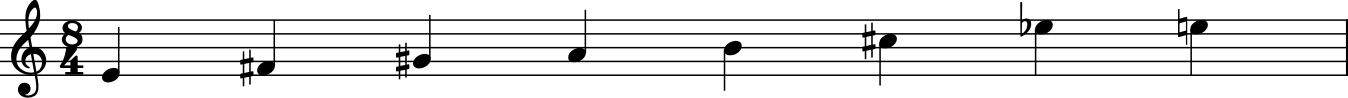

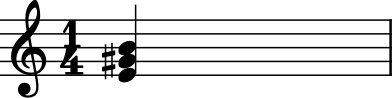

{ empty NotesRange }
<music21.note.Note E>
<music21.duration.Duration 0.125>
<music21.note.Note F>
<music21.duration.Duration 0.5>
<music21.note.Note B->
<music21.duration.Duration 1.0>
<music21.note.Note G>
<music21.duration.Duration 1.0>
<music21.note.Note B->
<music21.duration.Duration 0.5>
<music21.note.Note E->
<music21.duration.Duration 4.0>
<music21.note.Note B->
<music21.duration.Duration 0.5>
<music21.note.Note G#>
<music21.duration.Duration 1.0>
<music21.note.Note B->
<music21.duration.Duration 0.125>
<music21.note.Note F>
<music21.duration.Duration 1.0>
<music21.note.Note G#>
<music21.duration.Duration 1.0>
<music21.note.Note E->
<music21.duration.Duration 1.0>
<music21.note.Note B->
<music21.duration.Duration 1.0>
<music21.note.Note G>
<music21.duration.Duration 1.0>
<music21.note.Note B->
<music21.duration.Duration 1.0>
<music21.note.Note C>
<music21.duration.Duration 1.0>
<music21.note.Note F>
<music21.duration.Duration 1.0>
<music21.note.Note G#>
<music21.duration.Durati

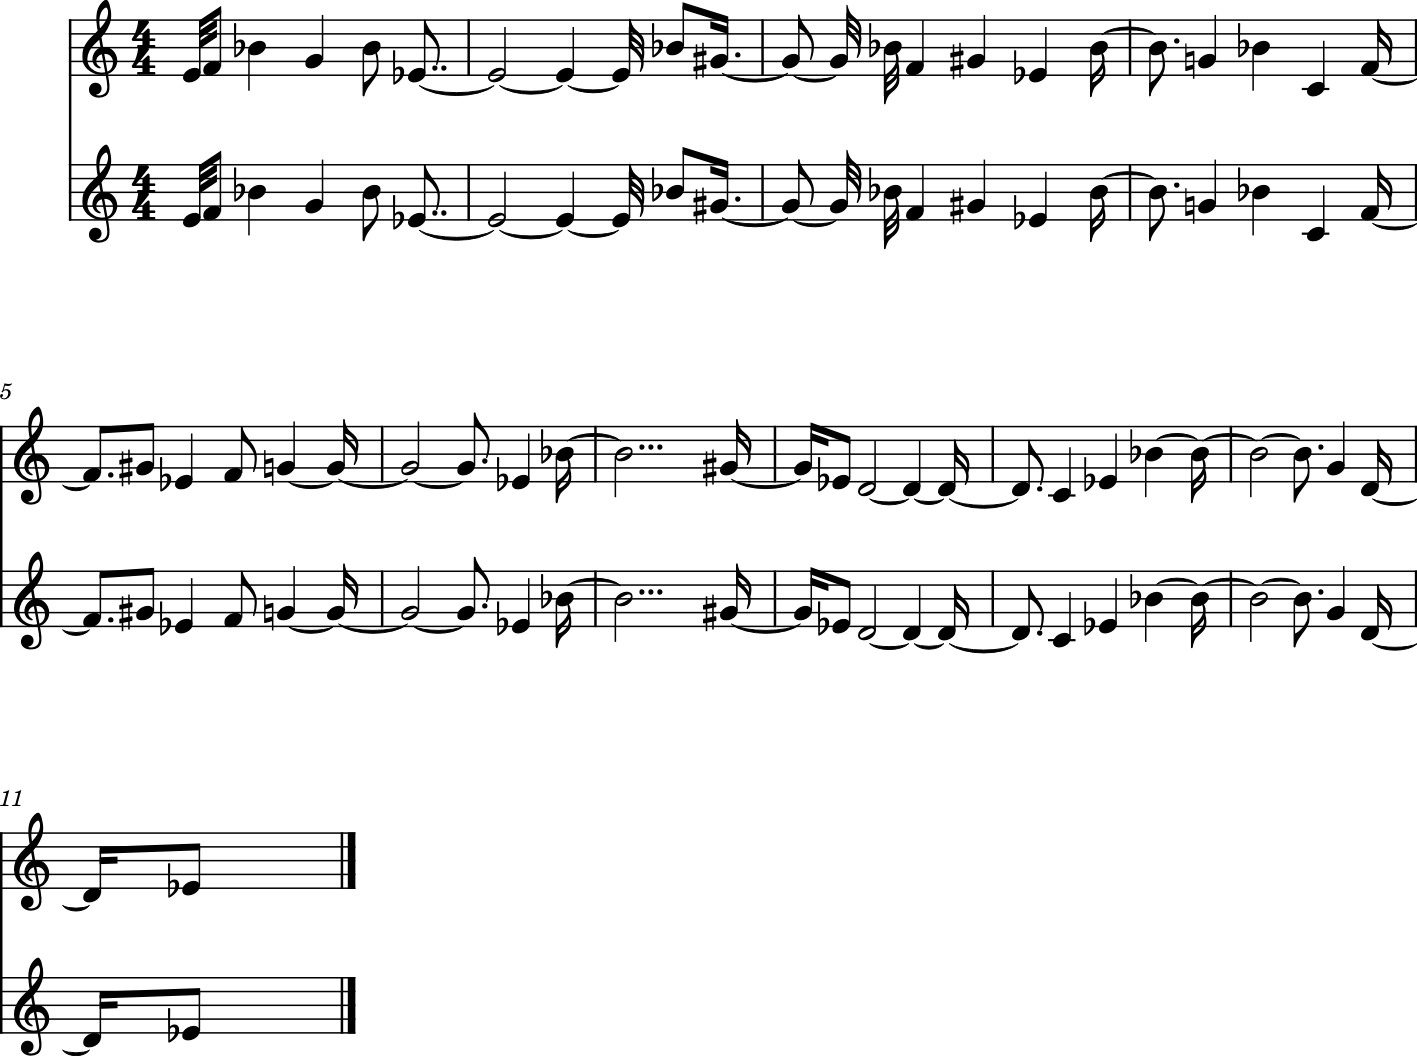

In [37]:
baseNoteSpring = note.Note('E4')
intervalSpring = scalesIntervalDictionnary["major"]
springScale = Scale (baseNoteSpring, intervalSpring)
springScale.show()

springChord = Chord(baseNoteSpring, springScale)
springChord.show()

springNotesRange = NotesRange()
springNotesRange.show()

springPath = get_path()

# input
octaveRegion = 2;
nbr = len(springPath);
bassNotes = [];  # stores music21's note.Note()
bassChords = []; # stores Chord objects

bassNotes.append(note.Note(pitch = springScale.baseNote.pitch.name, octave = octaveRegion)); # bassNotes[0]
bassChords.append(Chord(bassNotes[0], s));          

for i in range(nbr): 
    nr = NotesRange();
    nr.addChanceToNotesWithoutOctave(s.getNotesWithoutOctave()); # notes of the scale
    nr.multiplyChanceToNotesWithoutOctave(bassChords[i].getNotesWithoutOctave(), _probability = 3); # notes of the chord from the bassNotes[i]
    nr.multiplyChanceToNotesWithoutOctave([bassNotes[i]], _probability = 0); # avoir playing the same bassNotes[i] again
    nr.multiplyByFunction(gauss, note.Note(pitch = 6, octave = octaveRegion)); # range, to stay in the octaveRegion
        
    #nr.showPlot();
    #nr.show();
    bassNotes.append(nr.pickRandomNote());     #bassNotes[i+1]
    bassChords.append(Chord(bassNotes[i+1], s)); #bassChords[i+1]
    
#print("\nChords:")
score = stream.Score()
score.timeSignature = meter.TimeSignature('4/4')

measureBassNotes = stream.Part();
measureBassChords = stream.Part();

score.insert(0, measureBassChords);
score.insert(0, measureBassNotes);

for i in range(nbr):
    #print(i, bassChords[i].getText(), bassChords[i].getNotesWithoutOctave());  
    measureBassChords.append(bassChords[i].getChordObject());
    measureBassNotes.append(bassNotes[i]);

#score.show();

m = []
p = []
for i in range (nbr):
    #m.append(measureBassChords[i].pitch.name)
    p.append(measureBassNotes[i].pitch.name)


quotient=[]

for number in springPath:
    
    if number>1 : quotient.append(number/4)
    else : quotient.append(number)

#lol = Score (m, quotient) #, 'Emajor')
springLeft = Score(p, quotient)
#springLeft.play()
#lol.show()
#lol2.show()

In [ ]:
#springLeft.play()

## Summer

In [ ]:
# instruments : piano, percussion, guitar ???
# scale:G minor

In [ ]:
baseNoteSummer = note.Note('G4')
intervalSummer = scalesIntervalDictionnary["minor"]
summerScale = Scale(baseNoteSummer, intervalSummer)
summerScale.show()

## Autumn

In [ ]:
# instruments : piano, percussion, guitar, violin
# scale: F major

In [ ]:
baseNoteAutumn = note.Note('F4')
intervalAutumn = scalesIntervalDictionnary["major"]
autumnScale = Scale(baseNoteAutumn, intervalAutumn)
autumnScale.show()

## Winter

In [ ]:
# instruments : piano, percussion, guitar, counterbasson
# scale:F minor

In [ ]:
baseNoteWinter = note.Note('F4')
intervalWinter = scalesIntervalDictionnary["major"]
winterScale = Scale(baseNoteWinter, intervalWinter)
winterScale.show()